## Importing Various Libraries


In [5]:
# Import all libararies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

## Importing dataset 

In [18]:
# Set style for visualizations
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Load the college_performance dataset from OpenML
print("Loading the college_performance dataset from OpenML...")
try:
    dataset = fetch_openml(data_id=1590, as_frame=True) 
    X = pd.DataFrame(dataset.data)
    y = pd.Series(dataset.target)
    print(f"Dataset loaded successfully with {X.shape[0]} samples and {X.shape[1]} features.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # If OpenML is not accessible, create a small sample dataset for demonstration
    print("Creating a sample dataset for demonstration...")
    np.random.seed(42)
    X = pd.DataFrame({
        'GPA': np.random.uniform(2.0, 4.0, 100),
        'SAT_Score': np.random.randint(800, 1600, 100),
        'Study_Hours': np.random.randint(5, 40, 100),
        'Extracurricular': np.random.choice(['Yes', 'No'], 100),
        'Income_Category': np.random.choice(['Low', 'Medium', 'High'], 100),
    })
    y = pd.Series(np.random.choice(['Good', 'Average', 'Poor'], 100))
    print("Sample dataset created.")

print("\nDataset Preview:")
print(X.head())

Loading the college_performance dataset from OpenML...
Dataset loaded successfully with 48842 samples and 14 features.

Dataset Preview:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688            

## Data preprocessing

In [21]:
print("\nMissing values:")
print(X.isnull().sum())

# Handle missing values
X = X.fillna(X.median(numeric_only=True))
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode the target variable if needed
if y.dtype == 'object':
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(y)
    print(f"\nTarget classes: {target_encoder.classes_}")


Missing values:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


## Train test split 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Data normalization

In [27]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (34189, 14)
Testing set shape: (14653, 14)


## Data visualization


Exploring the dataset with visualizations...


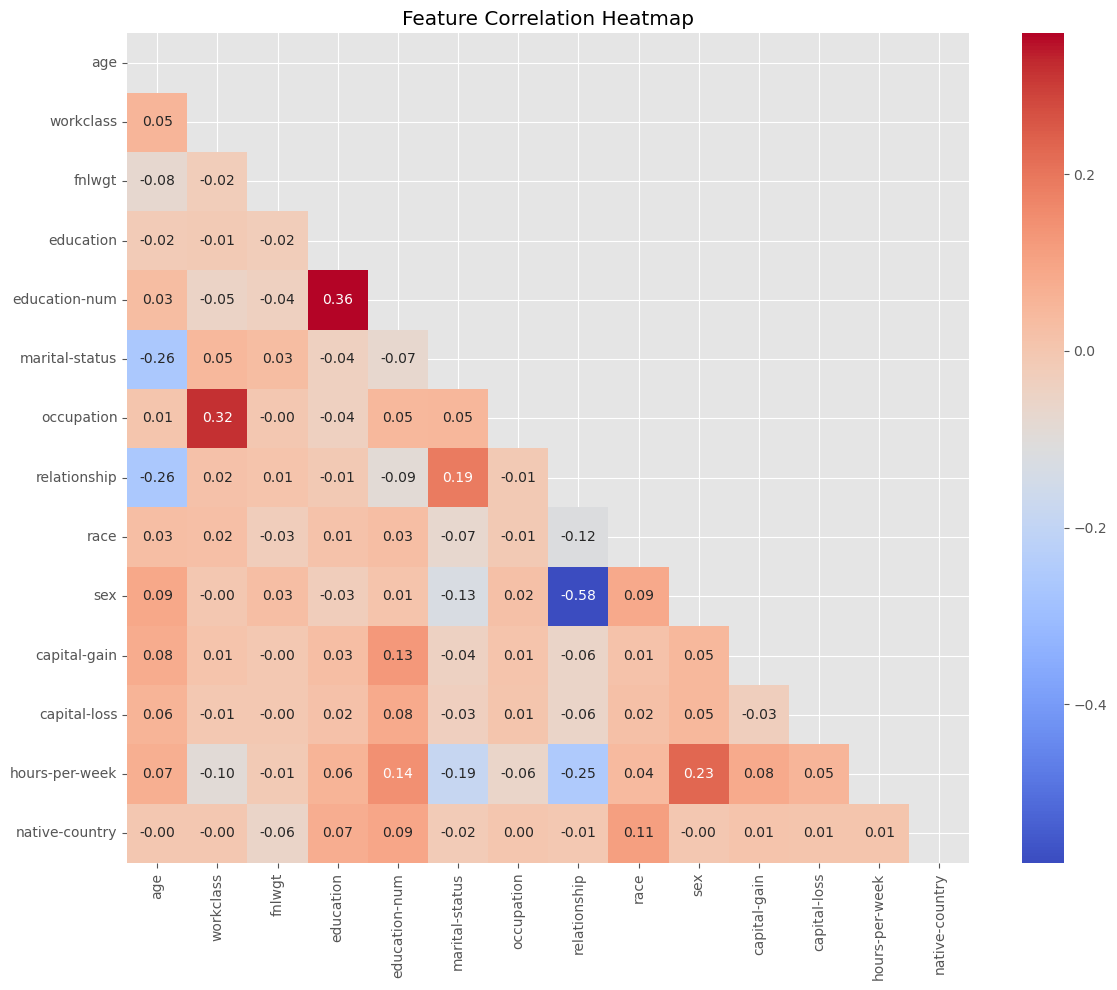

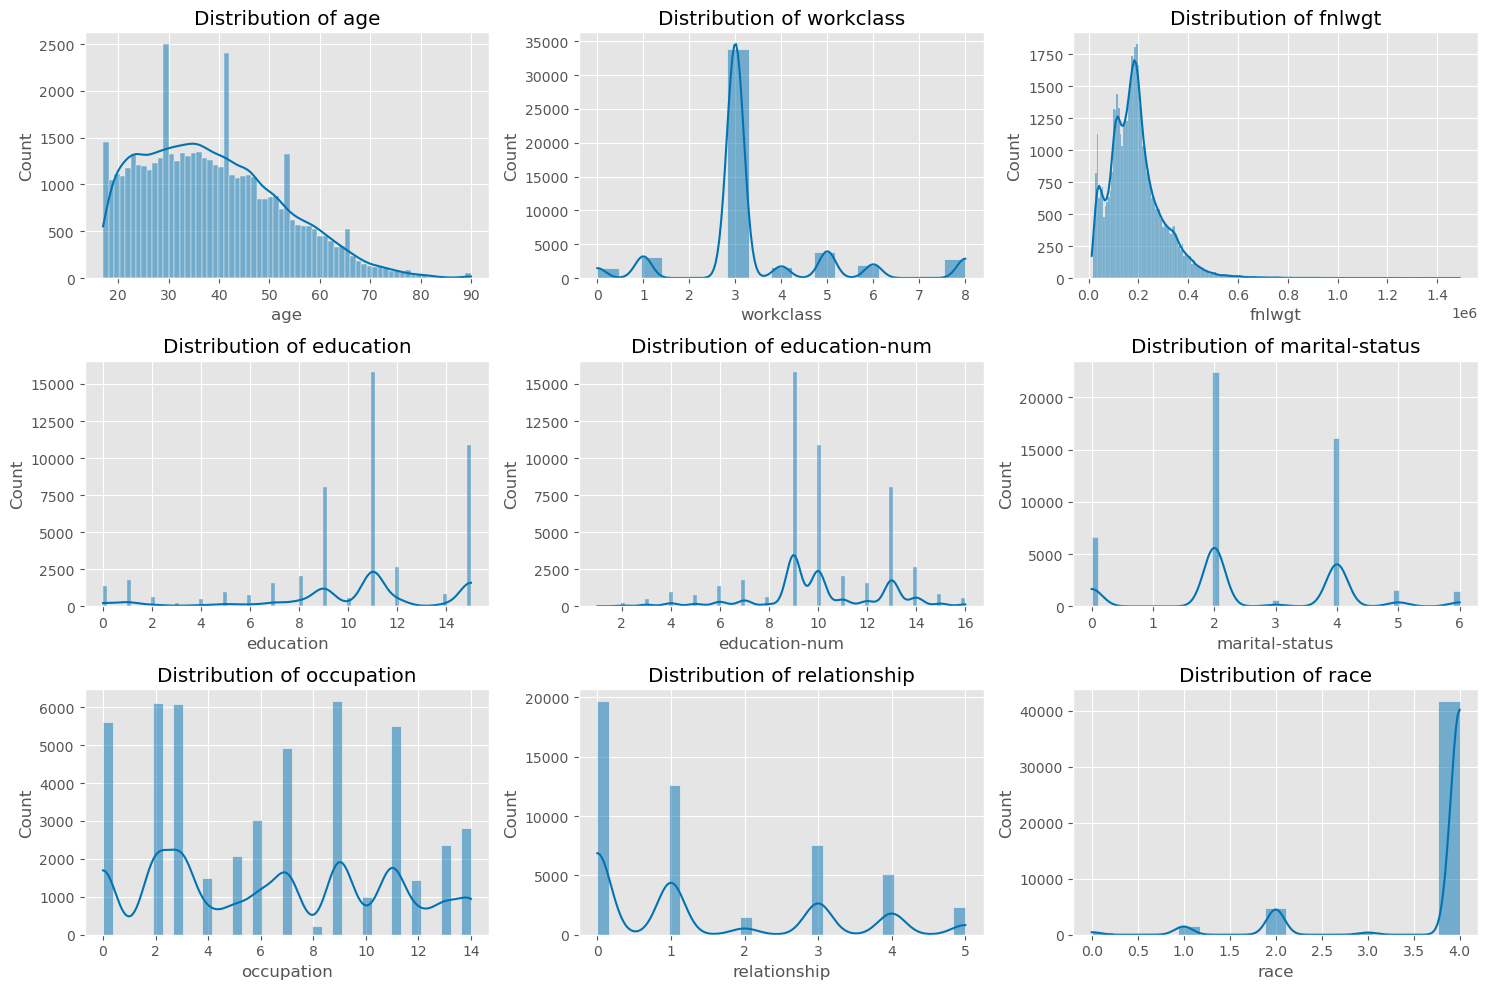

In [35]:
# Data Exploration and Visualization
print("\nExploring the dataset with visualizations...")

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = X.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Distribution of numerical features
num_cols = X.select_dtypes(include=np.number).columns.tolist()
if len(num_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(num_cols[:min(9, len(num_cols))]):
        plt.subplot(3, 3, i+1)
        sns.histplot(X[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()



## Trainning model

In [37]:
# Define models
print("\nTraining models...")
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train all models first
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print(f"{name} training complete.")

# Store predictions and accuracies
predictions = {}
accuracies = {}



Training models...
Training Logistic Regression...
Logistic Regression training complete.
Training Random Forest...
Random Forest training complete.
Training Support Vector Machine...
Support Vector Machine training complete.


## Performing evaluations 


Evaluating models...

Evaluating Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.90     11233
        >50K       0.71      0.46      0.56      3420

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.82     14653



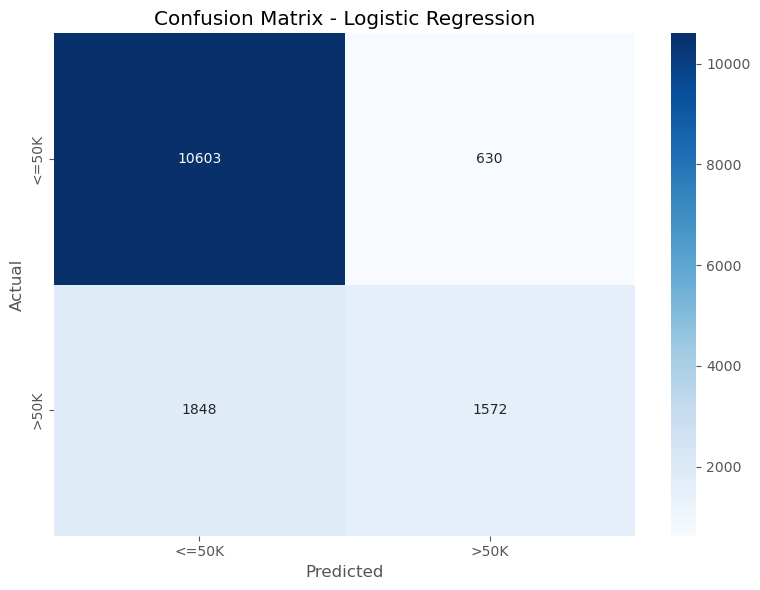

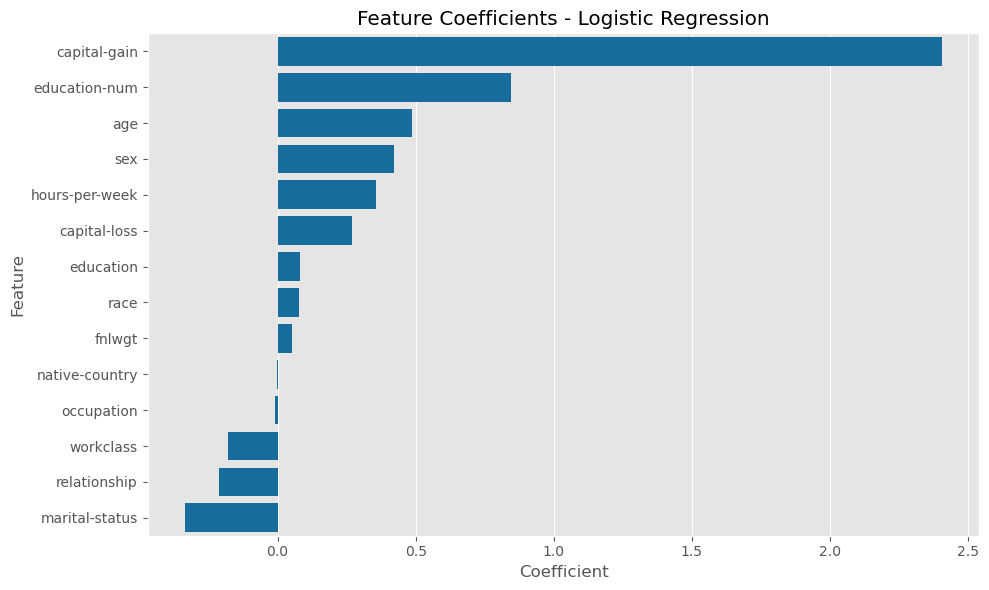


Evaluating Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11233
        >50K       0.74      0.64      0.68      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653



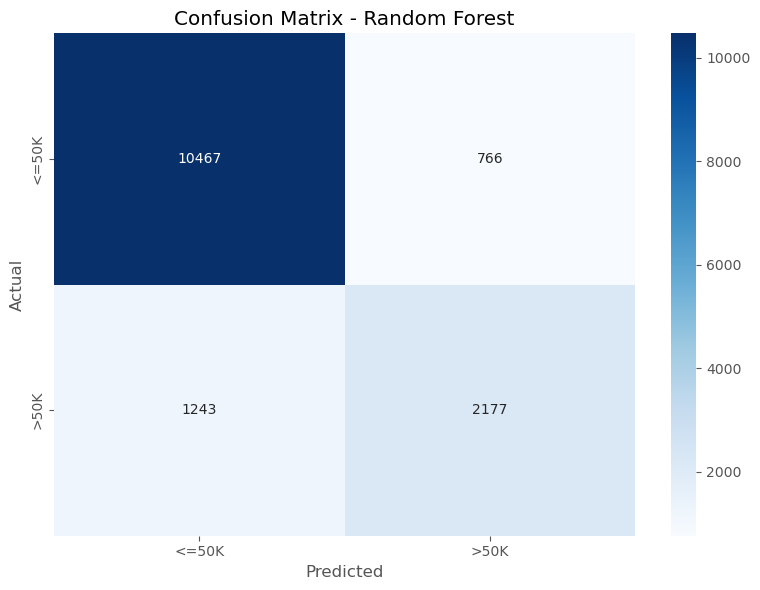

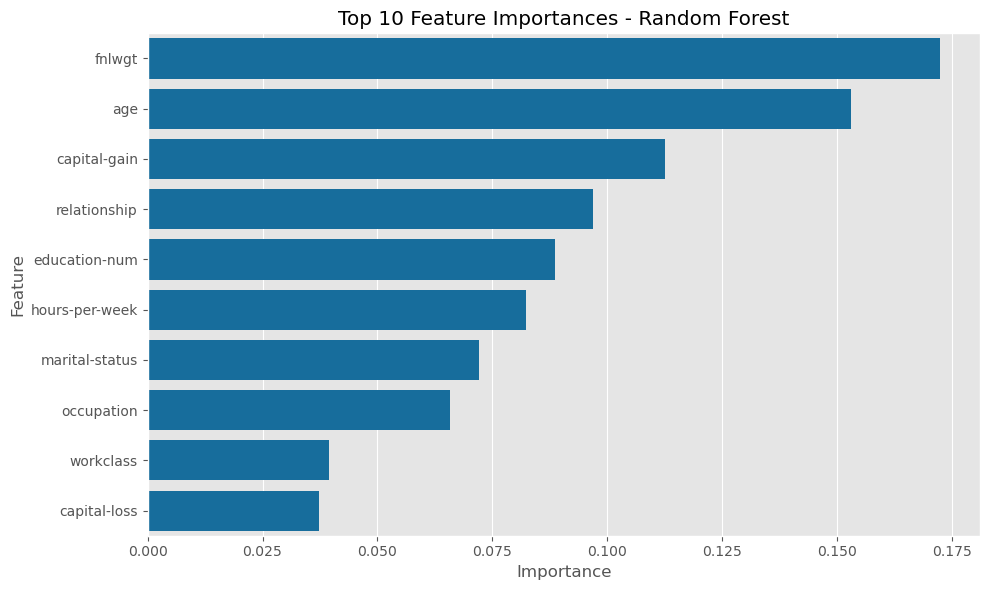


Evaluating Support Vector Machine...

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11233
        >50K       0.76      0.56      0.65      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



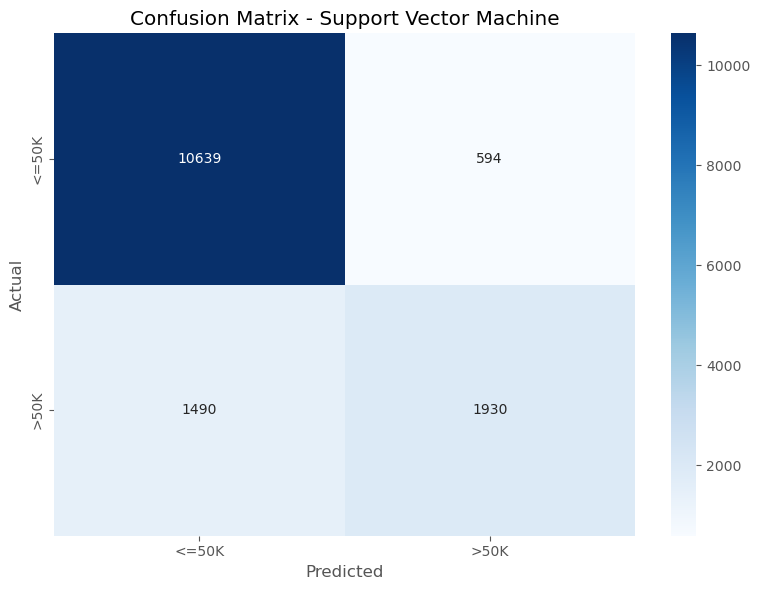

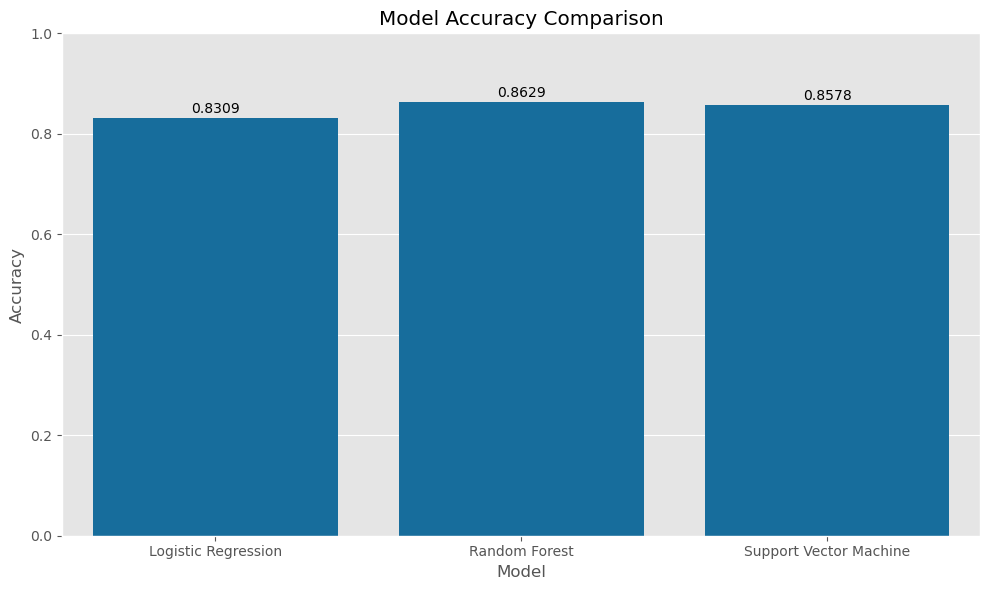


Model Performance Summary:
Logistic Regression: 0.8309
Random Forest: 0.8629
Support Vector Machine: 0.8578


In [39]:
# Now evaluate each model separately
print("\nEvaluating models...")
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    accuracies[name] = accuracy_score(y_test, y_pred)
    
    # Classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix visualization
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y) if hasattr(y, 'cat') else np.unique(y),
                yticklabels=np.unique(y) if hasattr(y, 'cat') else np.unique(y))
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Feature importance (for models that support it)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title(f'Top 10 Feature Importances - {name}')
        plt.tight_layout()
        plt.show()
    
    # For Logistic Regression coefficients
    if name == 'Logistic Regression':
        plt.figure(figsize=(10, 6))
        coef_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': model.coef_[0] if len(model.classes_) == 2 else model.coef_.mean(axis=0)
        }).sort_values('Coefficient', ascending=False)
        
        sns.barplot(x='Coefficient', y='Feature', data=coef_df)
        plt.title(f'Feature Coefficients - {name}')
        plt.tight_layout()
        plt.show()

# Compare model performances
model_names = list(models.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_values)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

print("\nModel Performance Summary:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


## Best model

In [42]:

# Determine the best model
best_model = max(accuracies.items(), key=lambda x: x[1])
print(f"\nThe best performing model is: {best_model[0]} with an accuracy of {best_model[1]:.4f}")


The best performing model is: Random Forest with an accuracy of 0.8629


## By T S Manish  {22R21A3358}